In [2]:
STREAM = 'Jhelum'

In [98]:
pmRA, pmDEC = 5, -2
pmPHI1, pmPHI2 = -5, 0.

In [4]:
MAG = 'WAVG_MAG_PSF_%s_DERED'
MAGG = MAG%'G'
MAGR = MAG%'R'
MAGI = MAG%'I'
MAGZ = MAG%'Z'

https://cdcvs.fnal.gov/redmine/projects/des-mw/wiki/Projected_Stream_Figures

In [5]:
%matplotlib inline

In [6]:
import sys
sys.path.append('/Users/nora/projects/proper_motions/code')

In [14]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import proper_motions as pm
reload(pm)
import results
import streamlib
import load_stream

In [10]:
pm.plot_pretty(fontsize=15)

## Load stream

In [16]:
res = pm.load_stream.create_results(pm.load_stream.streamlib.load_streams())
stream = res[STREAM]

In [12]:
on_width, off_width, offset = stream['selection_parameters']

In [18]:
gaia_des, des = pm.load_data(STREAM)

## Load isochrone

In [172]:
# mu2, age2, z2 = stream['modulus'], 12.5, 0.0001
# iso2 = pm.isochrone_factory('Dotter2008', age=age2, z=z2)

iso_params = stream['modulus'], stream['age'], stream['metallicity']
iso = pm.isochrone_factory('Dotter2008', age=iso_params[1], z=iso_params[2])
mu = iso_params[0]

iso_params2 = 15.3, 10.0, 0.0009
iso2 = pm.isochrone_factory('Dotter2008', age=iso_params2[1], z=iso_params2[2])
mu2 = iso_params2[0]

print iso_params
print iso_params2

(15.6, 12.0, 0.0009)
(15.3, 10.0, 0.0009)


# DES

## Select on- and off- stream regions

In [173]:
data = np.copy(des)
_, on_stream = pm.select_on(data, stream, on_width)
_, off_stream = pm.select_off(data, stream, off_width, offset)

## Plot Hess

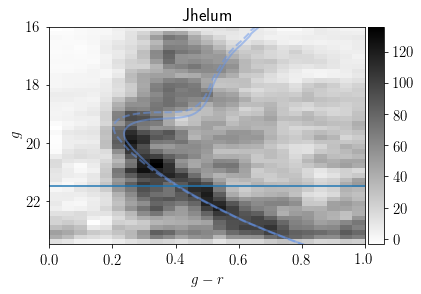

In [174]:
im = pm.plot_hess(stream, data[on_stream], data[off_stream])
plt.axhline(21.5)
plt.plot(iso.color, iso.mag+mu, '-', c='cornflowerblue', lw=2, alpha=0.5, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.plot(iso2.color, iso2.mag+mu, '--', c='cornflowerblue', lw=2, alpha=0.5, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.xlim(0,1)
plt.ylim(23.5,16)
pm.colorbar(im)

# Gaia x DES

## Select on- and off- stream

In [175]:
data = np.copy(gaia_des)
_, on_stream = pm.select_on(data, stream, on_width)
_, off_stream = pm.select_off(data, stream, off_width, offset)

## Plot Gaia-matched DES Hess

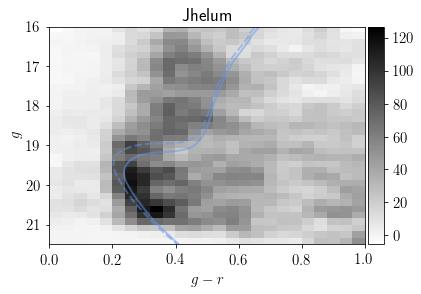

In [176]:
# im = plot_hess(stream, data[on_stream], data[off_stream], gmax=21.5, vmin=-5, vmax=35)
im = pm.plot_hess(stream, data[on_stream], data[off_stream], gmax=21.5)
plt.plot(iso.color, iso.mag+mu, '-', c='cornflowerblue', lw=2, alpha=0.5, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.plot(iso2.color, iso2.mag+mu, '--', c='cornflowerblue', lw=2, alpha=0.5, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.xlim(0,1)
plt.ylim(21.5,16)
pm.colorbar(im)

## Plot r-i vs. g-r

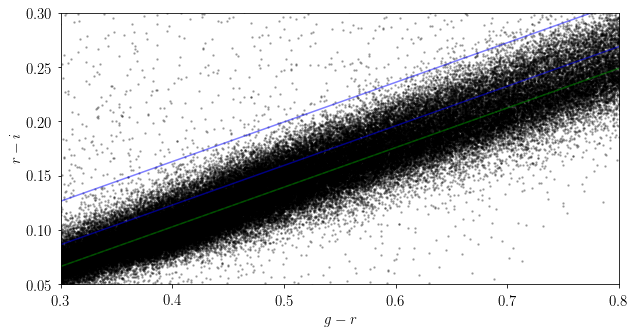

In [177]:
p = pm.calculate_locus(data)

# plot_color(stream, data[on_stream], data[off_stream])
plt.figure(figsize=(10,5))
plt.plot(data[MAGG][on_stream] - data[MAGR][on_stream], data[MAGR][on_stream] - data[MAGI][on_stream], 'k.', ms=3, alpha=0.25)
# plt.plot(data[MAGG][on_stream&pm_cut] - data[MAGR][on_stream&pm_cut], data[MAGR][on_stream&pm_cut] - data[MAGI][on_stream&pm_cut], 'g.', ms=3, alpha=0.5)
plt.xlim(0.3,0.8)
plt.ylim(0.05,0.3)
plt.xlabel(r'$g-r$')
plt.ylabel(r'$r-i$')

xx = np.linspace(0.3,0.8,100)
plt.plot(xx, p[0]*xx + p[1], 'g--', alpha=0.25)
plt.plot(xx, pm.locus(xx, p), 'g-', alpha=0.5)
plt.plot(xx, pm.locus(xx, p)+0.02, 'b-', alpha=0.5)
plt.plot(xx, pm.locus(xx, p)+0.06, 'b-', alpha=0.5)
plt.show()

## Color-magnitude and color-color selections

In [178]:
_, ri_cut = pm.select_gr_ri(data, stream, dmin=0.02, dmax=0.06, p=p)
_, iso_cut1 = pm.select_isochrone(data, stream, iso_params=[mu, age, z])
_, iso_cut2 = pm.select_isochrone(data, stream, C=[0.01,0.01], E=2, iso_params=[mu, age, z])
_, iso_cut3 = pm.select_isochrone(data, stream, C=[0.005,0.005], E=4, iso_params=[mu, age, z])

iso_cut = np.copy(iso_cut1)

mag_cut = data[MAGG] < 19.
color_cut = data[MAGG] - data[MAGR] > 0.4
# plx_cut = data['PARALLAX'] - 3*data['PARALLAX_ERROR'] < 0.
plx_cut = np.abs(data['PARALLAX']) < 0.5
# iso_cut &= mag_cut
ri_cut &= color_cut

Text(0,0.5,'$r-i$')

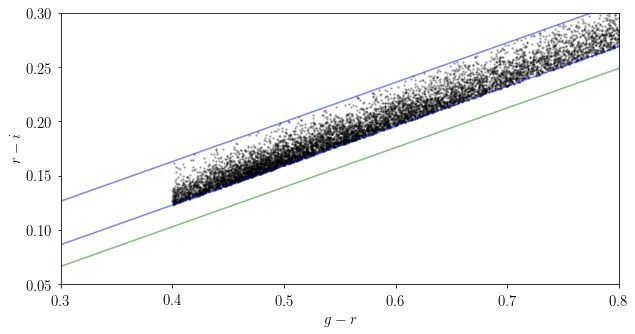

In [179]:
plt.figure(figsize=(10,5))
plt.plot(data[MAGG][on_stream&ri_cut&plx_cut] - data[MAGR][on_stream&ri_cut&plx_cut], data[MAGR][on_stream&ri_cut&plx_cut] - data[MAGI][on_stream&ri_cut&plx_cut], 'k.', ms=3, alpha=0.25)
plt.plot(xx, pm.locus(xx, p), 'g-', alpha=0.5)
plt.plot(xx, pm.locus(xx, p)+0.02, 'b-', alpha=0.5)
plt.plot(xx, pm.locus(xx, p)+0.06, 'b-', alpha=0.5)
plt.xlim(0.3,0.8)
plt.ylim(0.05,0.3)
plt.xlabel(r'$g-r$')
plt.ylabel(r'$r-i$')


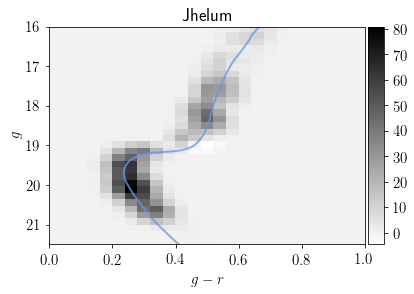

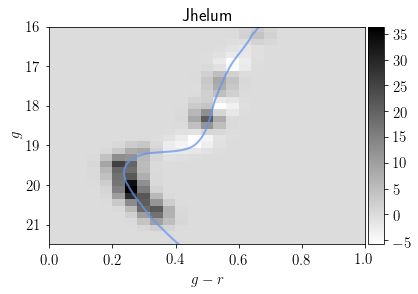

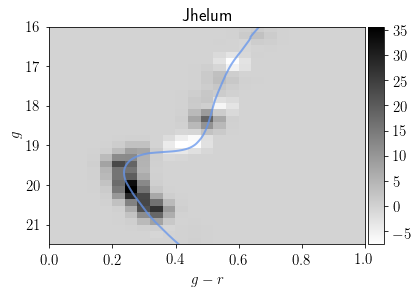

In [180]:
# Three isochrone selections: loosest --> tightest

im = pm.plot_hess(stream, data[on_stream&iso_cut1&plx_cut], data[off_stream&iso_cut1&plx_cut], gmax=21.5)
plt.plot(iso.color, iso.mag+mu, '-', c='cornflowerblue', lw=2, alpha=0.75, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.xlim(0,1)
plt.ylim(21.5,16)
pm.colorbar(im)

im = pm.plot_hess(stream, data[on_stream&iso_cut2&plx_cut], data[off_stream&iso_cut2&plx_cut], gmax=21.5)
plt.plot(iso.color, iso.mag+mu, '-', c='cornflowerblue', lw=2, alpha=0.75, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.xlim(0,1)
plt.ylim(21.5,16)
pm.colorbar(im)

im = pm.plot_hess(stream, data[on_stream&iso_cut3&plx_cut], data[off_stream&iso_cut3&plx_cut], gmax=21.5)
plt.plot(iso.color, iso.mag+mu, '-', c='cornflowerblue', lw=2, alpha=0.75, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.xlim(0,1)
plt.ylim(21.5,16)
pm.colorbar(im)

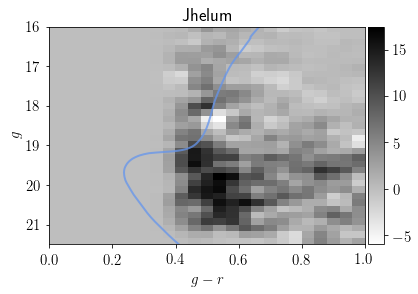

In [181]:
# w/ color-color cut

im = pm.plot_hess(stream, data[on_stream&ri_cut&plx_cut], data[off_stream&ri_cut&plx_cut], gmax=21.5)
plt.plot(iso.color, iso.mag+mu, '-', c='cornflowerblue', lw=2, alpha=0.75, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.xlim(0,1)
plt.ylim(21.5,16)
pm.colorbar(im)

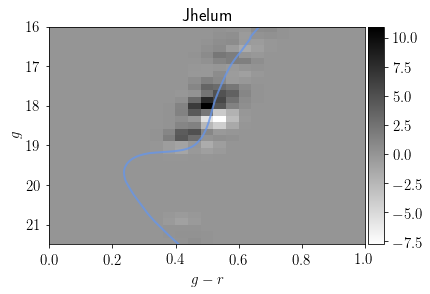

In [182]:
# w/ isochrone cut and color-color cut

im = pm.plot_hess(stream, data[on_stream&iso_cut&ri_cut&plx_cut], data[off_stream&iso_cut&ri_cut&plx_cut], gmax=21.5)
plt.plot(iso.color, iso.mag+mu, '-', c='cornflowerblue', lw=2, alpha=0.75, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.xlim(0,1)
plt.ylim(21.5,16)
pm.colorbar(im)

# Proper Motions

### Spatial cuts only

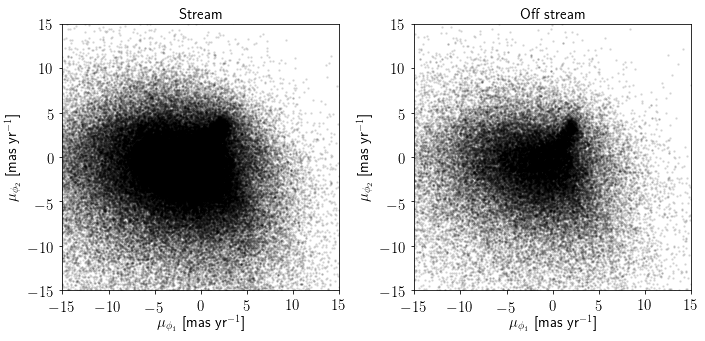

In [183]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

plt.sca(ax[0])
plt.plot(data['PMPHI1'][on_stream&plx_cut], data['PMPHI2'][on_stream&plx_cut], 'k.', ms=3, alpha=0.1)

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('$\mu_{\phi_1}$ [mas yr$^{-1}$]')
plt.ylabel('$\mu_{\phi_2}$ [mas yr$^{-1}$]')
plt.title('Stream', fontsize='medium')

plt.sca(ax[1])
plt.plot(data['PMPHI1'][off_stream&plx_cut], data['PMPHI2'][off_stream&plx_cut], 'k.', ms=3, alpha=0.1)

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('$\mu_{\phi_1}$ [mas yr$^{-1}$]')
plt.ylabel('$\mu_{\phi_2}$ [mas yr$^{-1}$]')
plt.title('Off stream', fontsize='medium')

plt.tight_layout()


### Spatial + isochrone cuts

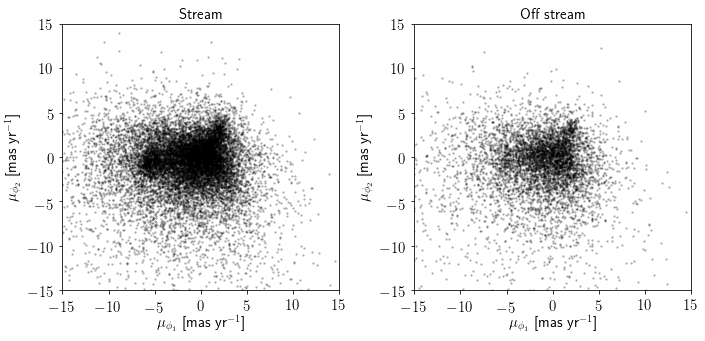

In [184]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

plt.sca(ax[0])
plt.plot(data['PMPHI1'][on_stream&iso_cut&plx_cut], data['PMPHI2'][on_stream&iso_cut&plx_cut], 'k.', ms=3, alpha=0.2)

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('$\mu_{\phi_1}$ [mas yr$^{-1}$]')
plt.ylabel('$\mu_{\phi_2}$ [mas yr$^{-1}$]')
plt.title('Stream', fontsize='medium')

plt.sca(ax[1])
plt.plot(data['PMPHI1'][off_stream&iso_cut&plx_cut], data['PMPHI2'][off_stream&iso_cut&plx_cut], 'k.', ms=3, alpha=0.2)

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('$\mu_{\phi_1}$ [mas yr$^{-1}$]')
plt.ylabel('$\mu_{\phi_2}$ [mas yr$^{-1}$]')
plt.title('Off stream', fontsize='medium')

plt.tight_layout()


### Spatial + isochrone + color-color cuts

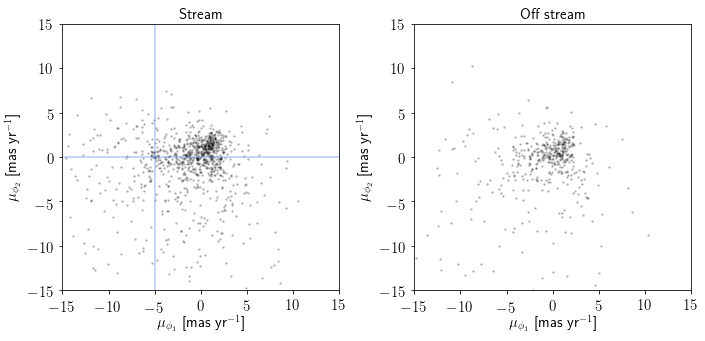

In [197]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

plt.sca(ax[0])
plt.plot(data['PMPHI1'][on_stream&iso_cut&ri_cut&plx_cut], data['PMPHI2'][on_stream&iso_cut&ri_cut&plx_cut], 'k.', ms=3, alpha=0.2)

plt.axvline(pmPHI1, alpha=0.5, c='cornflowerblue')
plt.axhline(pmPHI2, alpha=0.5, c='cornflowerblue')


import matplotlib as mpl
pm_mask = ((pmPHI1<-4) & (pmPHI1>-7) & (pmPHI2<3) & (pmPHI2>-1))
rect_xy = [-7, -1]
rect_w = -4 - -7
rect_h = 3 - -1
pr = mpl.patches.Rectangle(rect_xy, rect_w, rect_h, color='orange', alpha=0.3)
# plt.gca().add_artist(pr)


plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('$\mu_{\phi_1}$ [mas yr$^{-1}$]')
plt.ylabel('$\mu_{\phi_2}$ [mas yr$^{-1}$]')
plt.title('Stream', fontsize='medium')

plt.sca(ax[1])
plt.plot(data['PMPHI1'][off_stream&iso_cut&ri_cut&plx_cut], data['PMPHI2'][off_stream&iso_cut&ri_cut&plx_cut], 'k.', ms=3, alpha=0.2)

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('$\mu_{\phi_1}$ [mas yr$^{-1}$]')
plt.ylabel('$\mu_{\phi_2}$ [mas yr$^{-1}$]')
plt.title('Off stream', fontsize='medium')

plt.tight_layout()


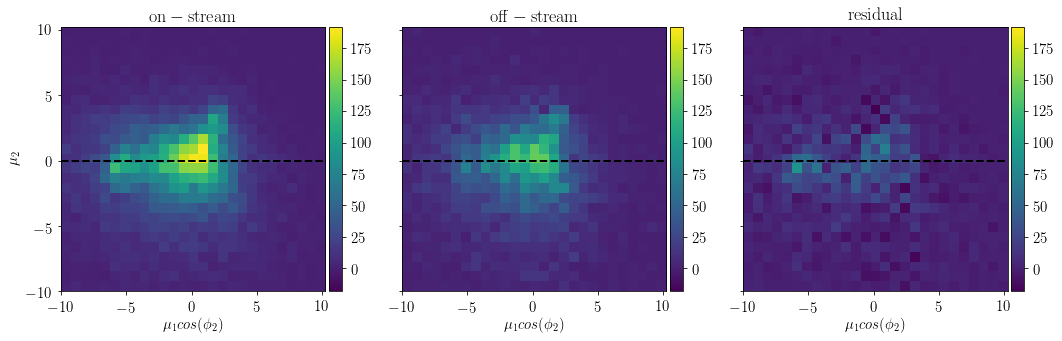

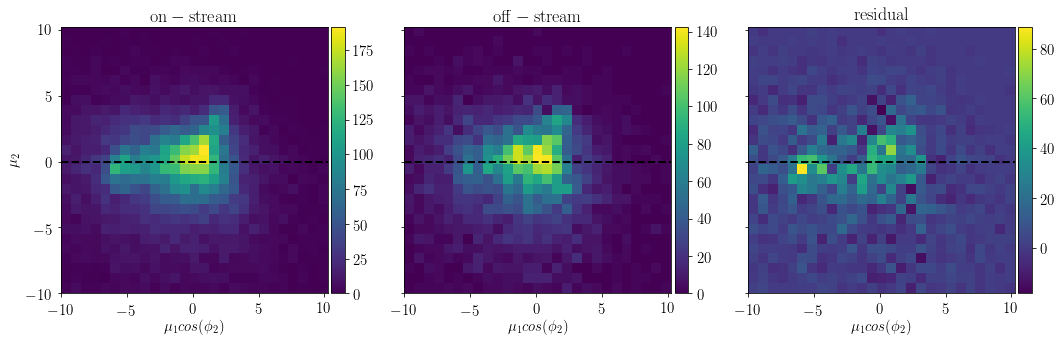

In [186]:
# uniform color scale
pm.pm_hist(stream, data[on_stream&iso_cut&plx_cut], data[off_stream&iso_cut&plx_cut], norm=pm.area_correction(data[on_stream&plx_cut], data[off_stream], 256), match_norm=True, dx=0.75)
# free color scale
pm.pm_hist(stream, data[on_stream&iso_cut&plx_cut], data[off_stream&iso_cut&plx_cut], norm=pm.area_correction(data[on_stream&plx_cut], data[off_stream], 256), match_norm=False, dx=0.75)

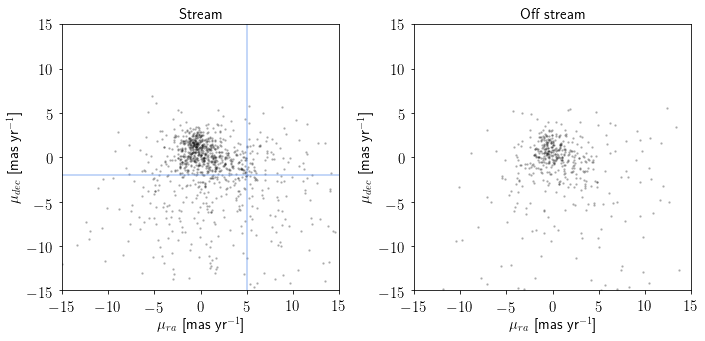

In [187]:
# pmra vs. pmdec

fig, ax = plt.subplots(1,2,figsize=(10,5))

plt.sca(ax[0])
plt.plot(data['PMRA'][on_stream&iso_cut&ri_cut&plx_cut], data['PMDEC'][on_stream&iso_cut&ri_cut&plx_cut], 'k.', ms=3, alpha=0.2)

plt.axvline(pmRA, alpha=0.5, c='cornflowerblue')
plt.axhline(pmDEC, alpha=0.5, c='cornflowerblue')

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('$\mu_{ra}$ [mas yr$^{-1}$]')
plt.ylabel('$\mu_{dec}$ [mas yr$^{-1}$]')
plt.title('Stream', fontsize='medium')

plt.sca(ax[1])
plt.plot(data['PMRA'][off_stream&iso_cut&ri_cut&plx_cut], data['PMDEC'][off_stream&iso_cut&ri_cut&plx_cut], 'k.', ms=3, alpha=0.2)

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('$\mu_{ra}$ [mas yr$^{-1}$]')
plt.ylabel('$\mu_{dec}$ [mas yr$^{-1}$]')
plt.title('Off stream', fontsize='medium')

plt.tight_layout()


## Stream proper motion (by-eye):

In [188]:
# by-eye estimate of stream proper motion

print pmRA, pmDEC
# pmPHI1, pmPHI2 = pm.pm_transform(stream, pmRA, pmDEC)
print pmPHI1, pmPHI2

5 -2
-5 0.0


In [189]:
# selection around stream pm in ra, dec

pm_cut = (np.abs(data['PMRA'] - pmRA) < 3*data['PMRA_ERROR']) & (np.abs(data['PMDEC'] - pmDEC) < 3*data['PMDEC_ERROR'])
pm_cut_tight = (np.abs(data['PMRA'] - pmRA) < data['PMRA_ERROR']) & (np.abs(data['PMDEC'] - pmDEC) < data['PMDEC_ERROR'])

## Visualize selected stars

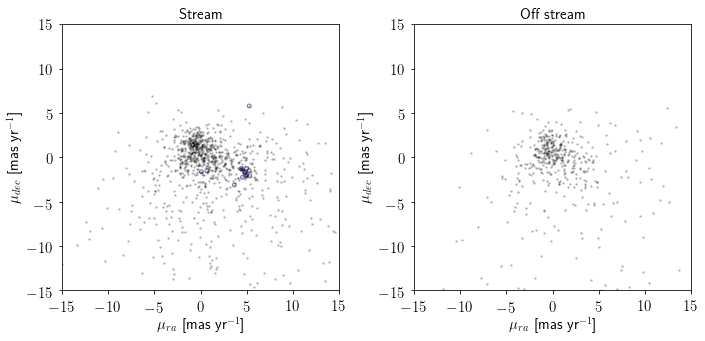

In [190]:
# pm selection highlighted

fig, ax = plt.subplots(1,2,figsize=(10,5))

plt.sca(ax[0])
plt.plot(data['PMRA'][on_stream&iso_cut&ri_cut&plx_cut], data['PMDEC'][on_stream&iso_cut&ri_cut&plx_cut], 'k.', ms=3, alpha=0.2)
# plt.plot(data['PMRA'][on_stream&iso_cut&ri_cut&pm_cut], data['PMDEC'][on_stream&iso_cut&ri_cut&pm_cut], '.', c='darkslateblue', ms=3, alpha=0.8, zorder=0)
plt.scatter(data['PMRA'][on_stream&iso_cut&ri_cut&pm_cut&plx_cut], data['PMDEC'][on_stream&iso_cut&ri_cut&pm_cut&plx_cut], edgecolor='darkslateblue', s=15, facecolor='none', alpha=0.75, zorder=0)

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('$\mu_{ra}$ [mas yr$^{-1}$]')
plt.ylabel('$\mu_{dec}$ [mas yr$^{-1}$]')
plt.title('Stream', fontsize='medium')

plt.sca(ax[1])
plt.plot(data['PMRA'][off_stream&iso_cut&ri_cut&plx_cut], data['PMDEC'][off_stream&iso_cut&ri_cut&plx_cut], 'k.', ms=3, alpha=0.2)

plt.xlim(-15,15)
plt.ylim(-15,15)
plt.xlabel('$\mu_{ra}$ [mas yr$^{-1}$]')
plt.ylabel('$\mu_{dec}$ [mas yr$^{-1}$]')
plt.title('Off stream', fontsize='medium')

plt.tight_layout()


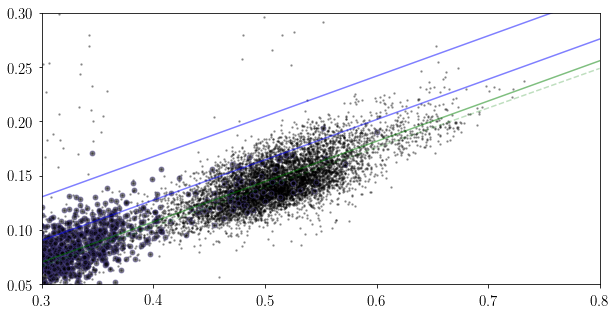

In [191]:
# pm selection highlighted

plt.figure(figsize=(10,5))

# plt.plot(data[MAGG][on_stream] - data[MAGR][on_stream], data[MAGR][on_stream] - data[MAGI][on_stream], 'k.', ms=3, alpha=0.1)
plt.plot(data[MAGG][on_stream&iso_cut&plx_cut] - data[MAGR][on_stream&iso_cut&plx_cut], data[MAGR][on_stream&iso_cut&plx_cut] - data[MAGI][on_stream&iso_cut&plx_cut], 'k.', ms=3, alpha=0.3)
# plt.plot(data[MAGG][on_stream&pm_cut] - data[MAGR][on_stream&pm_cut], data[MAGR][on_stream&pm_cut] - data[MAGI][on_stream&pm_cut], 'go', ms=5, alpha=0.5, fillstyle='none')
plt.plot(data[MAGG][on_stream&pm_cut&iso_cut&plx_cut] - data[MAGR][on_stream&pm_cut&iso_cut&plx_cut], data[MAGR][on_stream&pm_cut&iso_cut&plx_cut] - data[MAGI][on_stream&pm_cut&iso_cut&plx_cut], 'o', c='darkslateblue', ms=5, alpha=0.5, fillstyle='none')

# plt.plot(data[MAGG][off_stream&pm_cut&iso_cut] - data[MAGR][off_stream&pm_cut&iso_cut], data[MAGR][off_stream&pm_cut&iso_cut] - data[MAGI][off_stream&pm_cut&iso_cut], 'bo', ms=5, alpha=0.5, fillstyle='none')

plt.xlim(0.3,0.8)
plt.ylim(0.05,0.3)

xx = np.linspace(0.3,0.8,100)
plt.plot(xx, p[0]*xx + p[1], 'g--', alpha=0.25)
plt.plot(xx, pm.locus(xx), 'g-', alpha=0.5)
plt.plot(xx, pm.locus(xx)+0.02, 'b-', alpha=0.5)
plt.plot(xx, pm.locus(xx)+0.06, 'b-', alpha=0.5)
plt.show()

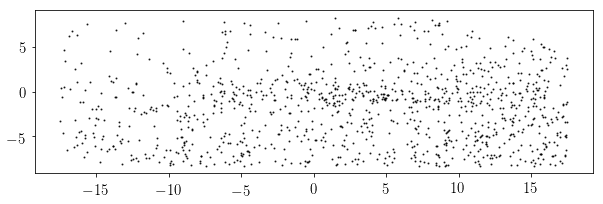

In [192]:
# spatial plot with selections
# on-stream: darkslateblue
# off-stream: green

plt.figure(figsize=(10,3))
plt.plot(data['PHI1'][iso_cut1&pm_cut_tight&plx_cut], data['PHI2'][iso_cut1&pm_cut_tight&plx_cut], 'k.', ms=2, alpha=0.8)
# plt.plot(data['PHI1'][iso_cut1&pm_cut&on_stream], data['PHI2'][iso_cut1&pm_cut&on_stream], '.', c='darkslateblue', ms=3, alpha=0.5)
# plt.plot(data['PHI1'][iso_cut1&pm_cut&off_stream], data['PHI2'][iso_cut1&pm_cut&off_stream], 'g.', ms=3, alpha=0.5)

# plt.plot(data['PHI1'][iso_cut&ri_cut&pm_cut], data['PHI2'][iso_cut&ri_cut&pm_cut], 'k.', ms=2, alpha=0.8)
# plt.plot(data['PHI1'][iso_cut&ri_cut&pm_cut&on_stream], data['PHI2'][iso_cut&ri_cut&pm_cut&on_stream], 'g.', ms=3, alpha=0.5)
# plt.plot(data['PHI1'][iso_cut&ri_cut&pm_cut&off_stream], data['PHI2'][iso_cut&ri_cut&pm_cut&off_stream], 'b.', ms=3, alpha=0.5)

plt.show()


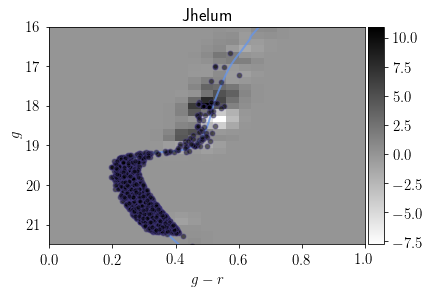

In [193]:
im = pm.plot_hess(stream, data[on_stream&iso_cut&ri_cut&plx_cut], data[off_stream&iso_cut&ri_cut&plx_cut], gmax=21.5)
plt.plot(iso.color, iso.mag+mu, '-', c='cornflowerblue', lw=2, alpha=0.75, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.plot(data[MAGG][on_stream&pm_cut&iso_cut&plx_cut] - data[MAGR][on_stream&pm_cut&iso_cut&plx_cut], data[MAGG][on_stream&pm_cut&iso_cut&plx_cut], 'o', c='darkslateblue', ms=5, alpha=0.5, fillstyle='none')
# plt.plot(data[MAGG][on_stream&iso_cut] - data[MAGR][on_stream&iso_cut], data[MAGG][on_stream&iso_cut], '.', c='darkslateblue', ms=1, alpha=0.2, fillstyle='none')
plt.xlim(0,1)
plt.ylim(21.5,16)
pm.colorbar(im)

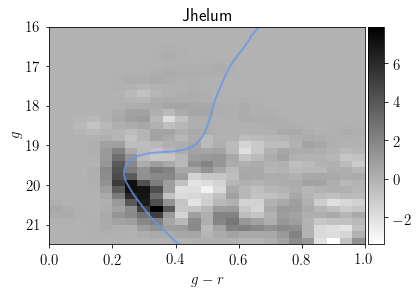

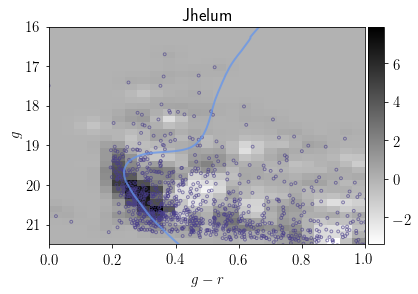

In [194]:
im = pm.plot_hess(stream, data[on_stream&pm_cut_tight&plx_cut], data[off_stream&pm_cut_tight&plx_cut], gmax=21.5)
plt.plot(iso.color, iso.mag+mu, '-', c='cornflowerblue', lw=2, alpha=0.75, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.xlim(0,1)
plt.ylim(21.5,16)
pm.colorbar(im)

im = pm.plot_hess(stream, data[on_stream&pm_cut_tight&plx_cut], data[off_stream&pm_cut_tight&plx_cut], gmax=21.5)
plt.plot(iso.color, iso.mag+mu, '-', c='cornflowerblue', lw=2, alpha=0.75, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
# plt.plot(data[MAGG][on_stream&pm_cut] - data[MAGR][on_stream&pm_cut], data[MAGG][on_stream&pm_cut], 'go', ms=5, alpha=0.5, fillstyle='none')
# plt.scatter(data[MAGG][on_stream&pm_cut] - data[MAGR][on_stream&pm_cut], data[MAGG][on_stream&pm_cut], s=5, alpha=0.4, edgecolor='darkslateblue', facecolor='none')
# plt.scatter(data[MAGG][on_stream&ri_cut] - data[MAGR][on_stream&ri_cut], data[MAGG][on_stream&ri_cut], s=5, alpha=0.4, edgecolor='darkslateblue', facecolor='none')
plt.scatter(data[MAGG][on_stream&pm_cut_tight&plx_cut] - data[MAGR][on_stream&pm_cut_tight&plx_cut], data[MAGG][on_stream&pm_cut_tight&plx_cut], s=8, alpha=0.6, edgecolor='darkslateblue', facecolor='none')
# plt.plot(data[MAGG][on_stream] - data[MAGR][on_stream], data[MAGG][on_stream], 'g.', ms=1, alpha=0.2, fillstyle='none')
plt.xlim(0,1)
plt.ylim(21.5,16)
pm.colorbar(im)

15.6 12.0 0.0009
15.3 10.0 0.0009


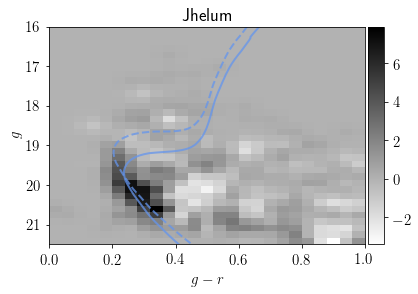

In [195]:
mu, age, z = stream['modulus'], stream['age'], stream['metallicity']
print mu, age, z
iso = pm.isochrone_factory('Dotter2008', age=age, z=z)

mu2, age2, z2 = stream['modulus'], stream['age'], stream['metallicity']
age2 = 10.
mu2 = 15.3
print mu2, age2, z2
iso2 = pm.isochrone_factory('Dotter2008', age=age2, z=z2)

im = pm.plot_hess(stream, data[on_stream&pm_cut_tight&plx_cut], data[off_stream&pm_cut_tight&plx_cut], gmax=21.5)
plt.plot(iso2.color, iso2.mag+mu2, '--', c='cornflowerblue', lw=2, alpha=0.75, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.plot(iso.color, iso.mag+mu, '-', c='cornflowerblue', lw=2, alpha=0.75, zorder=1, label='%.1f Gyr\n[Fe/H]=$%.2f$' %(age, iso.z2feh(z)))
plt.xlim(0,1)
plt.ylim(21.5,16)
pm.colorbar(im)